In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# 202331319_Muhammad Rizki Insani

In [17]:
image = cv2.imread('RGB_Nama.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#202331319_Muhammad Rizki Insani

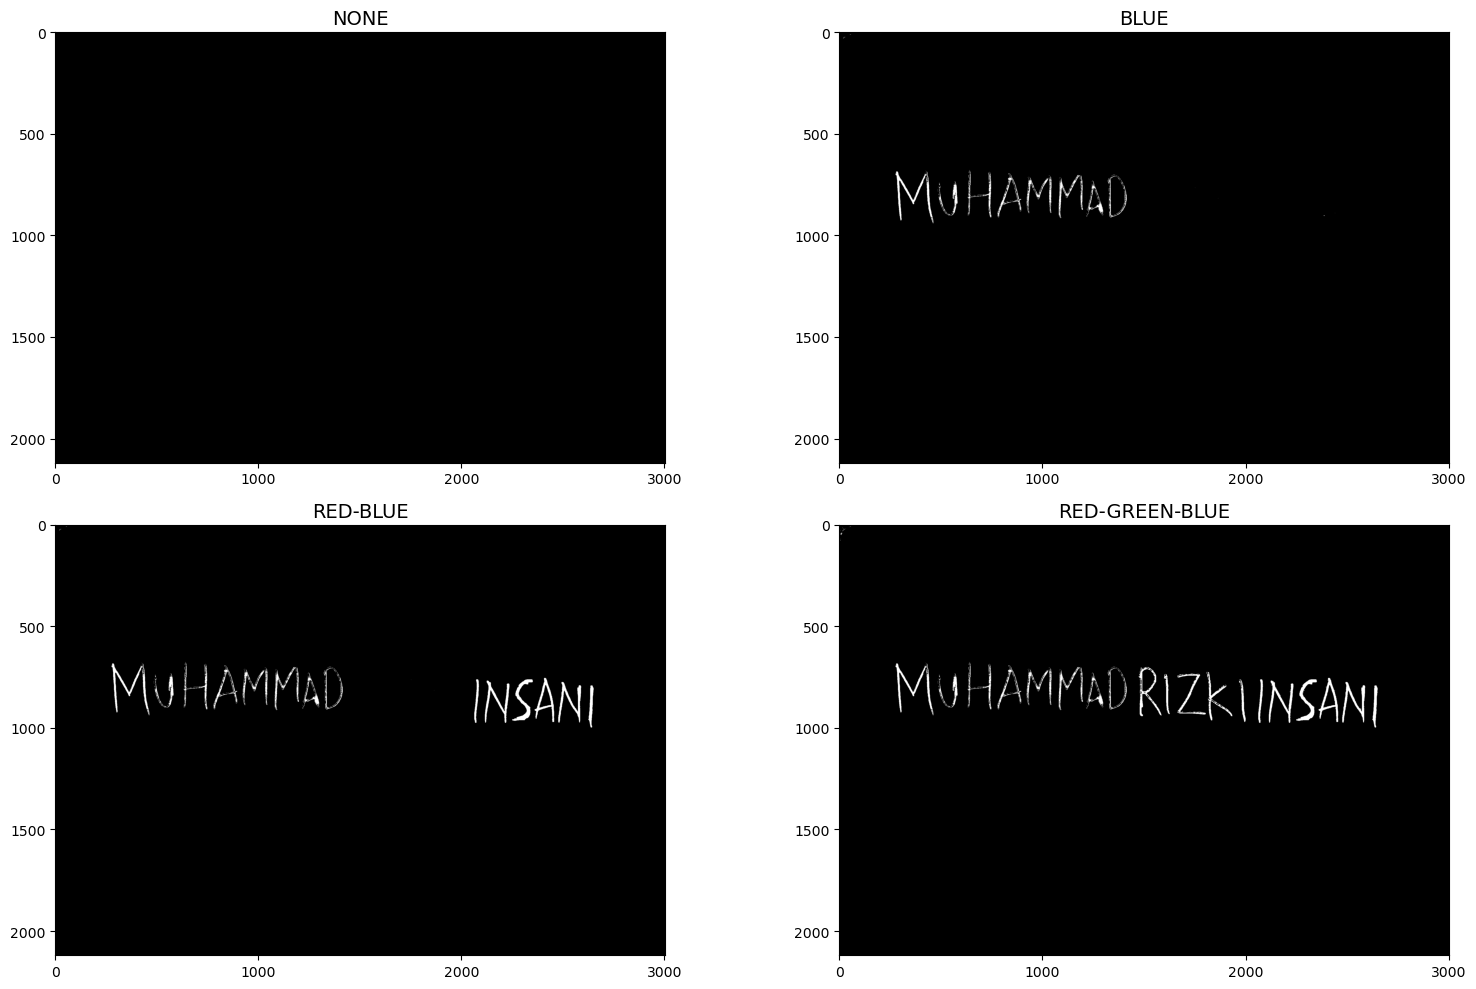

Nilai ambang batas yang digunakan:
Merah (Range 1): Lower = [ 0 50 50] , Upper = [ 10 255 255]
Merah (Range 2): Lower = [160  50  50] , Upper = [180 255 255]
Hijau: Lower = [40 40 40] , Upper = [ 90 255 255]
Biru: Lower = [100  50  50] , Upper = [130 255 255]

Nilai ambang batas ini dipilih berdasarkan rentang warna HSV standar untuk mendeteksi warna merah, hijau, dan biru pada teks dalam gambar.
Range ganda untuk warna merah digunakan karena merah berada di kedua ujung spektrum HSV.


In [27]:
# Fungsi threshold berdasarkan warna
def threshold_color(lower, upper):
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
    gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    _, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
    return thresh

# Nilai HSV untuk tiap warna
# Untuk warna merah perlu 2 range karena berada di ujung spektrum HSV
lower_red1 = np.array([0, 50, 50])     # Range pertama (0-10)
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 50, 50])   # Range kedua (160-180)
upper_red2 = np.array([180, 255, 255])

lower_green = np.array([40, 40, 40])
upper_green = np.array([90, 255, 255])

lower_blue = np.array([100, 50, 50])
upper_blue = np.array([130, 255, 255])

# Ambang warna
none = np.zeros_like(image_rgb[:, :, 0])

# Deteksi warna biru
blue = threshold_color(lower_blue, upper_blue)

# Deteksi warna merah dengan menggabungkan 2 range
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
red_result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_red)
red = cv2.cvtColor(red_result, cv2.COLOR_RGB2GRAY)
_, red = cv2.threshold(red, 10, 255, cv2.THRESH_BINARY)

# Deteksi warna hijau
green = threshold_color(lower_green, upper_green)

# Gabungan channel
red_blue = cv2.bitwise_or(red, blue)
rgb_all = cv2.bitwise_or(red_blue, green)

# Aplikasikan sedikit morfologi untuk membuat teks merah lebih jelas
kernel = np.ones((3,3), np.uint8)
red = cv2.dilate(red, kernel, iterations=1)
red_blue = cv2.bitwise_or(red, blue)
rgb_all = cv2.bitwise_or(red_blue, green)

# Daftar hasil & judul
titles = ['NONE', 'BLUE', 'RED-BLUE', 'RED-GREEN-BLUE']
images = [none, blue, red_blue, rgb_all]

# Plot 2x2 dengan sumbu (angka)
plt.figure(figsize=(16, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=14)
    plt.xticks(np.arange(0, image.shape[1], 1000))  # Tampilkan angka axis dengan interval 1000
    plt.yticks(np.arange(0, image.shape[0], 500))   # Tampilkan angka axis dengan interval 500

plt.tight_layout()
plt.show()

# Menampilkan nilai ambang batas yang digunakan
print("Nilai ambang batas yang digunakan:")
print("Merah (Range 1): Lower =", lower_red1, ", Upper =", upper_red1)
print("Merah (Range 2): Lower =", lower_red2, ", Upper =", upper_red2)
print("Hijau: Lower =", lower_green, ", Upper =", upper_green)
print("Biru: Lower =", lower_blue, ", Upper =", upper_blue)
print("\nNilai ambang batas ini dipilih berdasarkan rentang warna HSV standar untuk mendeteksi warna merah, hijau, dan biru pada teks dalam gambar.")
print("Range ganda untuk warna merah digunakan karena merah berada di kedua ujung spektrum HSV.")
# 202331319_Muhammad Rizki Insani 

